In [1]:
# Dependencies
import matplotlib.pyplot as plt
import requests
import pandas as pd
from dotenv import load_dotenv
import os

load_dotenv()
api_key = os.getenv("OPEN_WEATHERMAP_API_KEY")

In [2]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"

# Build partial query URL
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&q="

In [10]:
# List of cities
cities = ["London", "New York", "Paris", "Las Vegas", "Stockholm", "Sydney", "Tokyo", "Cape Town", "Rio de Janeiro", "Beijing"]

# set up lists to hold response info
list_lat = []
list_lng = []
temp = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    list_lat.append(response['coord']['lat'])
    list_lng.append(response['coord']['lon'])
    temp.append(response['main']['temp'])
    

# Print the results
print(f"The latitude information received is: {list_lat}")
print(f"The longitude information received is: {list_lng}")
print(f"The temperature information received is: {temp}")

The latitude information received is: [51.5085, 40.7143, 48.8534, 36.175, 59.3326, -33.8679, 35.6895, -33.9258, -22.9028, 39.9075]
The longitude information received is: [-0.1257, -74.006, 2.3488, -115.1372, 18.0649, 151.2073, 139.6917, 18.4232, -43.2075, 116.3972]
The temperature information received is: [290.02, 298.91, 291.34, 313.16, 289.18, 282.33, 305.84, 282.51, 298.35, 302.09]


In [15]:
# create a DataFrame from cities, lat, and temp
df_city = cities
df_lat = list_lat
df_lng = list_lng
df_temp = temp

dict = {"city": df_city, "lat": df_lat, "lng": df_lng, "temp": df_temp}
df = pd.DataFrame(dict)
df

,city,lat,lng,temp
0,London,51.5085,-0.1257,290.02
1,New York,40.7143,-74.0060,298.91
2,Paris,48.8534,2.3488,291.34
3,Las Vegas,36.1750,-115.1372,313.16
4,Stockholm,59.3326,18.0649,289.18
5,Sydney,-33.8679,151.2073,282.33
6,Tokyo,35.6895,139.6917,305.84
7,Cape Town,-33.9258,18.4232,282.51
8,Rio de Janeiro,-22.9028,-43.2075,298.35
9,Beijing,39.9075,116.3972,302.09


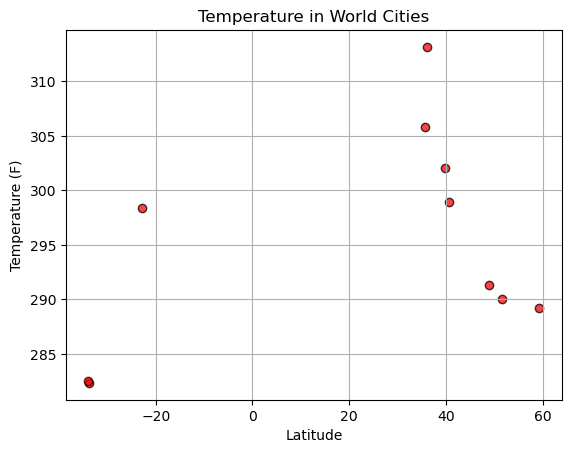

In [23]:
# Build a scatter plot for each data type
scatter_plt = plt.scatter(df["lat"], df["temp"], marker="o", facecolors="red", edgecolors="black", alpha=0.75)
#line_plt = plt.plot(df["lat"], df["temp"], color="blue")


# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()